# Mingxin Liu
# Convolution

The use of convolution is much faster to do linear filtering. All needs to be done is to create a kernel of the size corresponding to how much you would like to add the blurring onto the original image. Then apply FFT (fast fourier transform) on both the kernel matrix and the original image, then multiply them together to get the blurred result. 

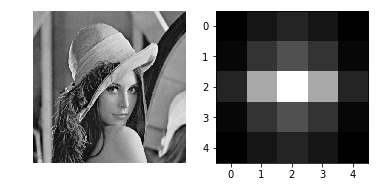

In [88]:
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from scipy import signal
import PIL 
from PIL import Image
from scipy import fftpack

# load the image as grayscale
f=mpimg.imread("lena.png")         


# show image
plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')      
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(g, cmap='gray')

h,w = f.shape[:2]



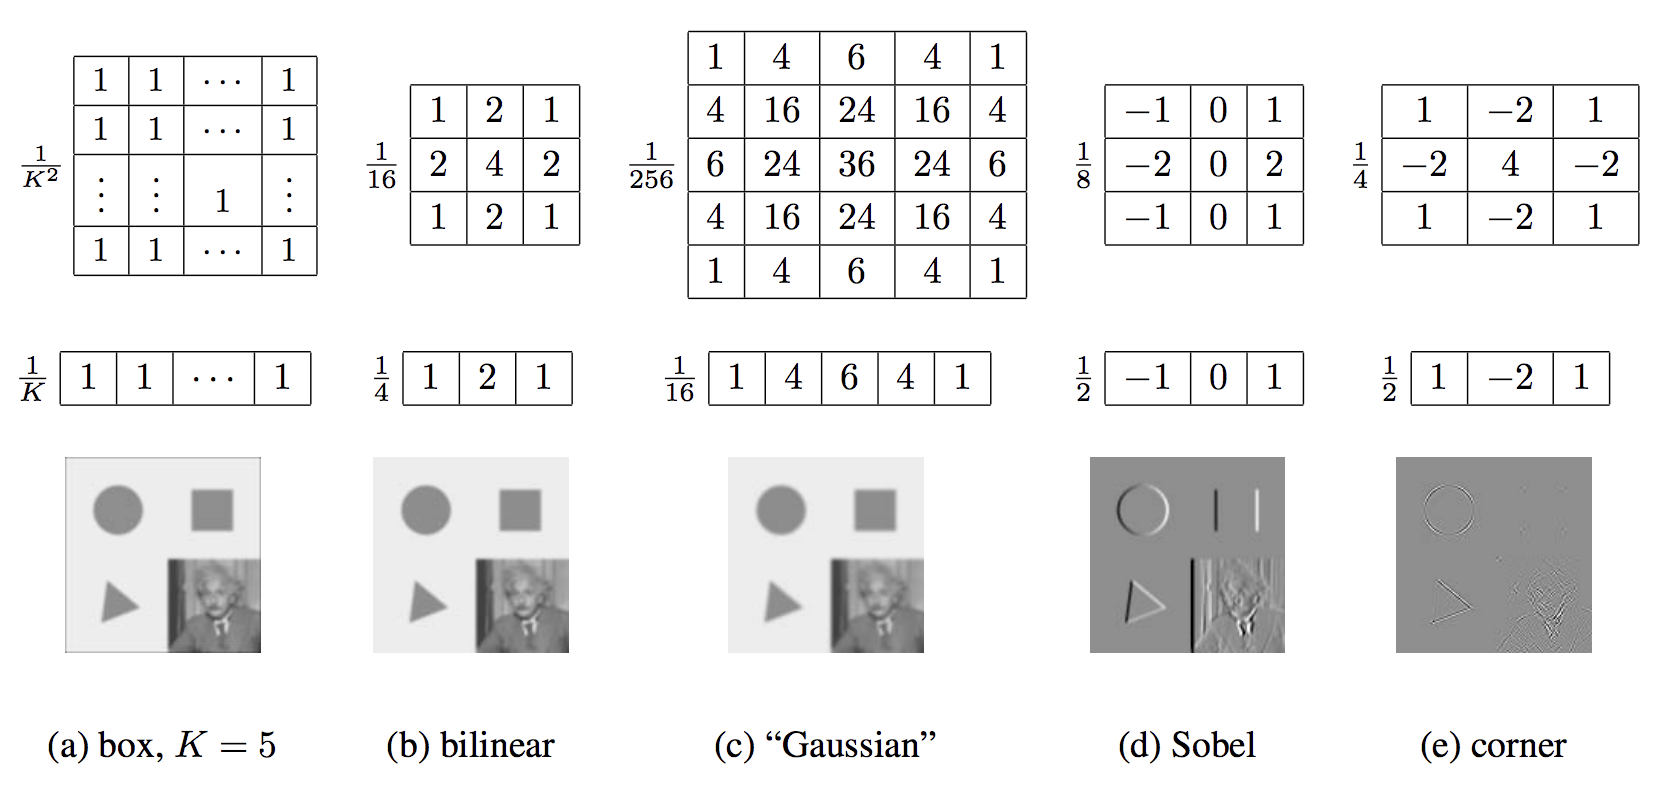

In [47]:
Img = Image.open('convolution.png','r')
Img

Here are 5 different types of filter kernels that could be implemented in this case to achieve convolution. For the project's purpose, I will implement the Gaussian filter first and will explore with other ones as well. 

In [95]:
# "Gaussian" kernel defined in Lecture 3b. Page3
g = 1.0/256 * np.array([[1, 4, 6, 4, 1], 
                        [2, 8, 12, 8, 2], 
                        [6, 24, 36, 24, 6],  
                        [2, 8, 12, 8, 2], 
                        [1, 4, 6, 4, 1]]) ;

Here is the implementation of the Gaussian kernel.


So if we implement the filter using the traditional convolution, the code will be much more complex. Because we would need have two nested loops and to multiply each row and column of the kernel with every row and column of the image matrix. 


Therefore in this case, if we use fourier transform and convert both the kernel and image matrix into frequency domain, we thus can just simply multiply the image matrix with the kernel and get the blurring effects. 


But before we could do that, we will need to set the kernel and image matrix as the same size for matrix multiplication. In order to do that, we are using the np.pad function to set them to the same size.

In [89]:
kernel_pad_m=h-1
kernel_pad_n=w-1
img_pad_width=len(g)-1

kernel_pad=np.pad(g,((0,kernel_pad_m),(0,kernel_pad_n)),'constant')
img_pad=np.pad(f,((0,img_pad_width),(0,img_pad_width)),'constant')

img_pad.shape

(516, 516)

In [93]:
img_fft=fftpack.fft2(img_pad)
kernel_fft=fftpack.fft2(kernel_pad)

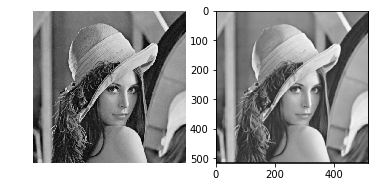

In [94]:
IMG = np.multiply(img_fft,kernel_fft)
new_img = abs(fftpack.ifft2(IMG))

plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')      
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(new_img, cmap='gray')



In [102]:
b = 1.0/8 * np.array([[-1, 0,1], 
                        [-2,0,2], 
                        [-1,0,1]])


Now we are trying the Sobel filter. 

In [106]:
kernel_pad_m=h-1
kernel_pad_n=w-1
img_pad_width=len(b)-1

kernel_pad=np.pad(b,((0,kernel_pad_m),(0,kernel_pad_n)),'constant')
img_pad=np.pad(f,((0,img_pad_width),(0,img_pad_width)),'constant')

img_pad.shape

(514, 514)

In [107]:
img_fft=fftpack.fft2(img_pad)
kernel_fft=fftpack.fft2(kernel_pad)

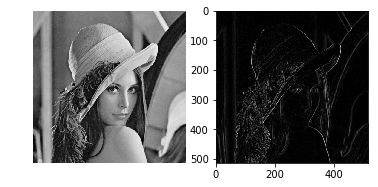

In [108]:
IMG = np.multiply(img_fft,kernel_fft)
new_img = abs(fftpack.ifft2(IMG))

plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')      
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(new_img, cmap='gray')


The result shows very unclear edges of the original image. This is because Sobel operator is a simple approximation to a directional or oriented filter.

Here let's explore more with the corner filter.

In [112]:
b = 1.0/4 * np.array([[1, -2,1], 
                        [-2,4,-2], 
                        [1,-2,1]])


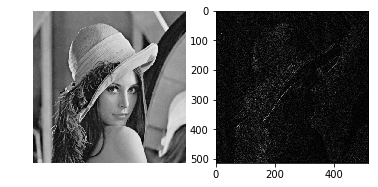

In [113]:
kernel_pad_m=h-1
kernel_pad_n=w-1
img_pad_width=len(b)-1

kernel_pad=np.pad(b,((0,kernel_pad_m),(0,kernel_pad_n)),'constant')
img_pad=np.pad(f,((0,img_pad_width),(0,img_pad_width)),'constant')

img_pad.shape
img_fft=fftpack.fft2(img_pad)
kernel_fft=fftpack.fft2(kernel_pad)
IMG = np.multiply(img_fft,kernel_fft)
new_img = abs(fftpack.ifft2(IMG))

plt.subplot(1, 2, 1)
plt.imshow(f, cmap='gray')      
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(new_img, cmap='gray')

Now the edge is even less clear with the corner filter.


 I explored the convolution method with different kernel sizes as well, and the results are shown above.